In [49]:
import pandas as pd
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [50]:
mypath=Path("..//HolidaySales/DataSets/Main_gold.csv")

In [51]:
holiday=pd.read_csv(mypath,  index_col="DATE", infer_datetime_format=True, parse_dates=True
)

In [52]:
holiday.head()

,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,retail_index,Consumer_debt_service,GDP_growth,sales,GDP,close
DATE,,,,,,,,,,,
1992-11-01,0.812100,1.11120,85.3,7.4,-3.664766,91.12,4.660212,4.4,-18182.99304,-576.109447,339.50
1993-11-01,0.762175,1.06640,81.2,6.6,-4.077295,96.43,4.755414,2.6,-15860.78098,-676.804025,363.25
1994-11-01,0.667100,1.11575,91.6,5.6,-4.587534,89.19,5.120072,4.1,-12429.20455,-618.354534,384.50
1995-11-01,0.485533,1.06225,88.2,5.6,-4.990644,85.37,5.594352,2.2,-14721.98639,-742.978904,381.95
1996-11-01,0.722600,1.23225,99.2,5.4,-4.278919,87.88,5.777011,4.4,-14186.08089,-621.669592,377.60


<AxesSubplot:title={'center':'consumer_debt_service'}, xlabel='DATE'>

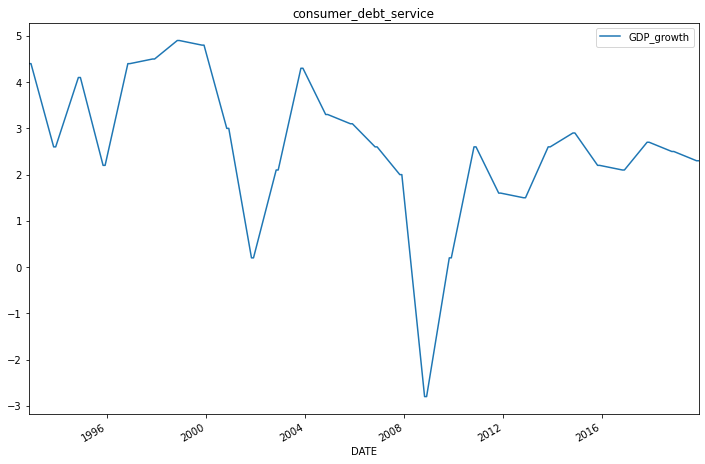

In [53]:
holiday[["GDP_growth"]].plot(figsize=(12, 8), title="consumer_debt_service")

In [54]:
#feature_path=Path("nov_dec_featuress.csv")

In [55]:
#features=pd.read_csv(feature_path,  index_col="DATE", infer_datetime_format=True, parse_dates=True)

In [56]:
#features.head()

In [57]:
#nytimes=pd.read_csv(Path("nytimes_nltk.csv"), index_col="pub_date", infer_datetime_format=True, parse_dates=True)

In [58]:
#nytimes.head()

<AxesSubplot:xlabel='DATE'>

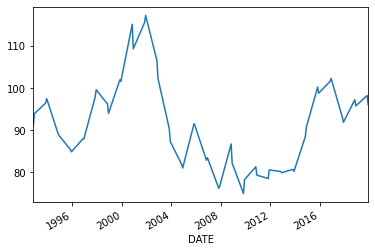

In [59]:
holiday.retail_index.plot()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

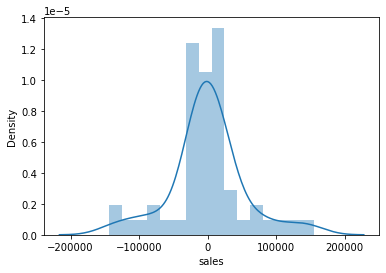

In [60]:
sns.distplot(holiday.sales)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gas_prices', ylabel='Density'>

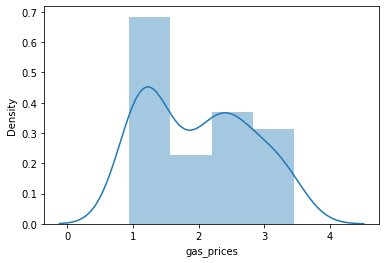

In [61]:
sns.distplot(holiday.gas_prices)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPI', ylabel='Density'>

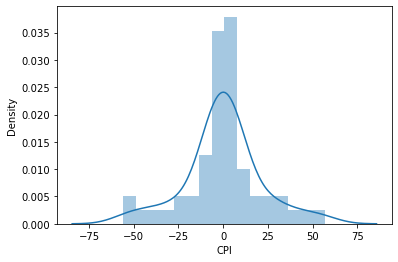

In [62]:
sns.distplot(holiday.CPI)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP', ylabel='Density'>

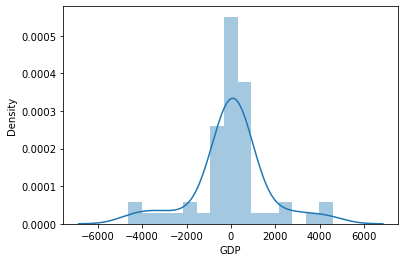

In [63]:
sns.distplot(holiday.GDP)

In [64]:
holiday.columns

Index(['NYT_sentiment', 'gas_prices', 'consumer_sentiments',
       'unemployment_rate', 'CPI', 'retail_index', 'Consumer_debt_service',
       'GDP_growth', 'sales', 'GDP', 'close'],
      dtype='object')

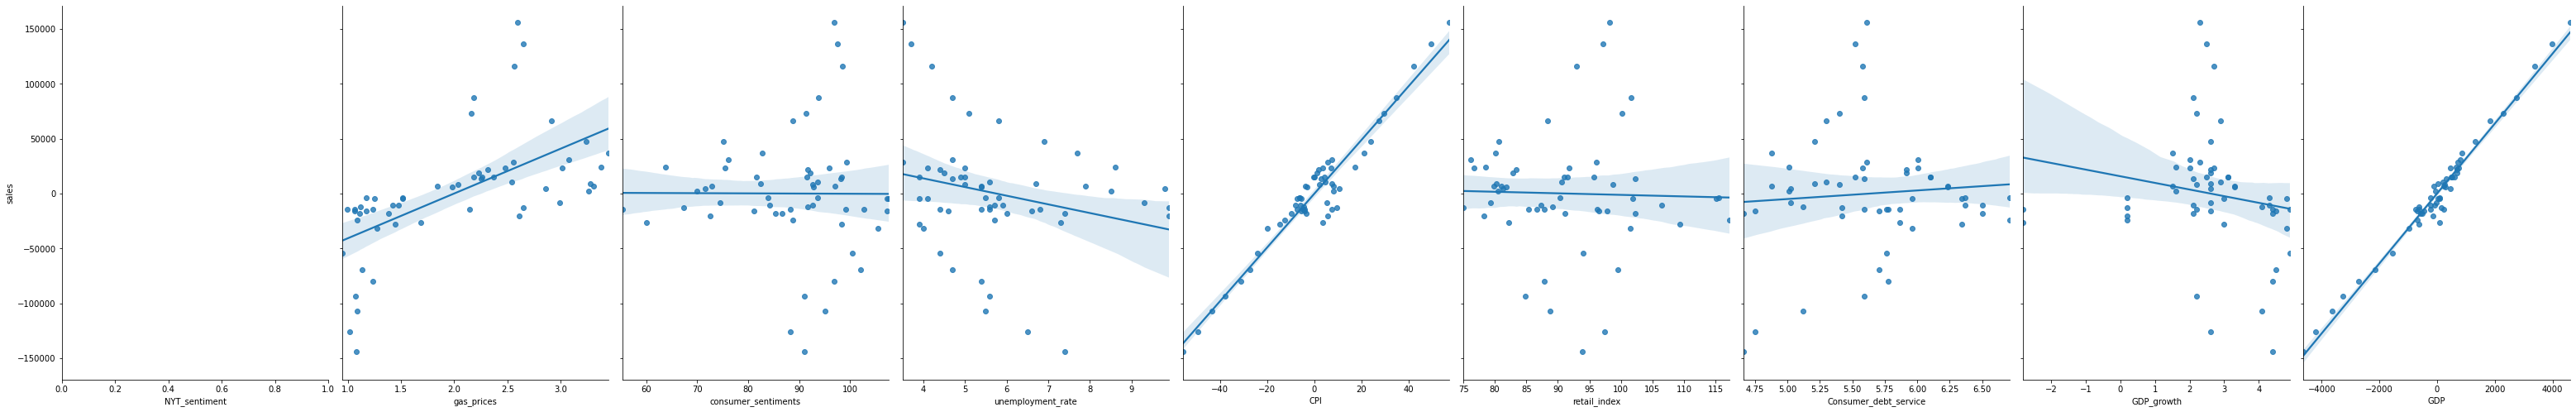

In [65]:
sns.pairplot(holiday, x_vars=['NYT_sentiment','gas_prices', 'consumer_sentiments','unemployment_rate','CPI','retail_index','Consumer_debt_service','GDP_growth','GDP'], y_vars='sales', height=7, aspect=.7, kind='reg')

In [66]:
#quantified pearson corelation values between sales and other features(GDPCI)
holiday.CPI.corr(holiday.sales)

0.965211349955966

In [67]:
holiday.GDP.corr(holiday.sales)

0.9884916815568923

In [68]:
holiday.GDP.corr(holiday.sales)

0.9884916815568923

In [69]:
holiday.NYT_sentiment.corr(holiday.sales)

-0.19755848249589494

In [70]:
#correlation table
holiday.corr()

,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,retail_index,Consumer_debt_service,GDP_growth,sales,GDP,close
NYT_sentiment,1.000000,-0.359748,0.141274,0.041893,-0.183963,-0.019460,-0.114457,0.345912,-0.197558,-0.181612,-0.350953
gas_prices,-0.359748,1.000000,-0.491512,0.325284,0.682532,-0.553542,-0.302524,-0.367889,0.599383,0.590662,0.884859
consumer_sentiments,0.141274,-0.491512,1.000000,-0.772300,-0.201631,0.563745,0.267027,0.732948,-0.003984,-0.054932,-0.397444
unemployment_rate,0.041893,0.325284,-0.772300,1.000000,-0.021729,-0.540780,-0.483871,-0.381928,-0.243156,-0.204064,0.331468
CPI,-0.183963,0.682532,-0.201631,-0.021729,1.000000,-0.151752,-0.059089,-0.324210,0.965211,0.969799,0.682911
retail_index,-0.019460,-0.553542,0.563745,-0.540780,-0.151752,1.000000,0.417569,0.143131,-0.027074,-0.033127,-0.409803
Consumer_debt_service,-0.114457,-0.302524,0.267027,-0.483871,-0.059089,0.417569,1.000000,-0.060483,0.076767,0.128035,-0.497224
GDP_growth,0.345912,-0.367889,0.732948,-0.381928,-0.324210,0.143131,-0.060483,1.000000,-0.179655,-0.242846,-0.371098
sales,-0.197558,0.599383,-0.003984,-0.243156,0.965211,-0.027074,0.076767,-0.179655,1.000000,0.988492,0.576120
GDP,-0.181612,0.590662,-0.054932,-0.204064,0.969799,-0.033127,0.128035,-0.242846,0.988492,1.000000,0.555678


In [23]:
holiday=holiday.drop(['retail_index', 'consumer_sentiments', 'gas_prices'], axis=1)

In [24]:
#correlation table
holiday.corr()

,NYT_sentiment,unemployment_rate,CPI,Consumer_debt_service,GDP_growth,sales,GDP,close
NYT_sentiment,1.000000,0.041893,-0.183963,-0.114457,0.345912,-0.197558,-0.181612,-0.350953
unemployment_rate,0.041893,1.000000,-0.021729,-0.483871,-0.381928,-0.243156,-0.204064,0.331468
CPI,-0.183963,-0.021729,1.000000,-0.059089,-0.324210,0.965211,0.969799,0.682911
Consumer_debt_service,-0.114457,-0.483871,-0.059089,1.000000,-0.060483,0.076767,0.128035,-0.497224
GDP_growth,0.345912,-0.381928,-0.324210,-0.060483,1.000000,-0.179655,-0.242846,-0.371098
sales,-0.197558,-0.243156,0.965211,0.076767,-0.179655,1.000000,0.988492,0.576120
GDP,-0.181612,-0.204064,0.969799,0.128035,-0.242846,0.988492,1.000000,0.555678
close,-0.350953,0.331468,0.682911,-0.497224,-0.371098,0.576120,0.555678,1.000000


<AxesSubplot:>

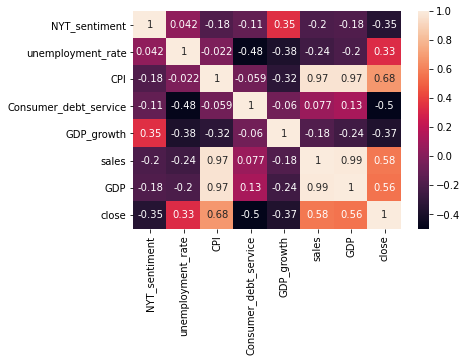

In [25]:
#heath map of the dataframe
sns.heatmap(holiday.corr(),annot=True)

In [26]:
#estimating beta values-model fitting using least square criteria

In [27]:
holiday

,NYT_sentiment,unemployment_rate,CPI,Consumer_debt_service,GDP_growth,sales,GDP,close
DATE,,,,,,,,
1992-11-01,0.812100,7.4,-3.664766,4.660212,4.4,-18182.993040,-576.109447,339.50
1993-11-01,0.762175,6.6,-4.077295,4.755414,2.6,-15860.780980,-676.804025,363.25
1994-11-01,0.667100,5.6,-4.587534,5.120072,4.1,-12429.204550,-618.354534,384.50
1995-11-01,0.485533,5.6,-4.990644,5.594352,2.2,-14721.986390,-742.978904,381.95
1996-11-01,0.722600,5.4,-4.278919,5.777011,4.4,-14186.080890,-621.669592,377.60
1997-11-01,0.855950,4.6,-5.541533,5.705666,4.5,-15907.241200,-467.952693,313.80
1998-11-01,0.348533,4.4,-7.364987,5.761093,4.9,-14045.354160,-239.847761,292.70
1999-11-01,0.373900,4.1,-7.232319,5.959830,4.8,-4767.364590,15.527123,291.35
2000-11-01,0.327100,3.9,-5.521962,6.341266,3.0,-4842.438969,73.970783,265.50


assigning target and features

In [28]:

holiday['lagged_return']=holiday.sales.shift()

holiday

,NYT_sentiment,unemployment_rate,CPI,Consumer_debt_service,GDP_growth,sales,GDP,close,lagged_return
DATE,,,,,,,,,
1992-11-01,0.812100,7.4,-3.664766,4.660212,4.4,-18182.993040,-576.109447,339.50,NaN
1993-11-01,0.762175,6.6,-4.077295,4.755414,2.6,-15860.780980,-676.804025,363.25,-18182.993040
1994-11-01,0.667100,5.6,-4.587534,5.120072,4.1,-12429.204550,-618.354534,384.50,-15860.780980
1995-11-01,0.485533,5.6,-4.990644,5.594352,2.2,-14721.986390,-742.978904,381.95,-12429.204550
1996-11-01,0.722600,5.4,-4.278919,5.777011,4.4,-14186.080890,-621.669592,377.60,-14721.986390
1997-11-01,0.855950,4.6,-5.541533,5.705666,4.5,-15907.241200,-467.952693,313.80,-14186.080890
1998-11-01,0.348533,4.4,-7.364987,5.761093,4.9,-14045.354160,-239.847761,292.70,-15907.241200
1999-11-01,0.373900,4.1,-7.232319,5.959830,4.8,-4767.364590,15.527123,291.35,-14045.354160
2000-11-01,0.327100,3.9,-5.521962,6.341266,3.0,-4842.438969,73.970783,265.50,-4767.364590


In [29]:
holiday=holiday.dropna()

In [30]:
X=holiday.copy()

In [31]:
X.drop({"lagged_return"}, axis=1, inplace=True)

In [32]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(55, 8)


In [33]:
y=holiday['lagged_return'].values.reshape(-1,1)

In [34]:
holiday.tail()

,NYT_sentiment,unemployment_rate,CPI,Consumer_debt_service,GDP_growth,sales,GDP,close,lagged_return
DATE,,,,,,,,,
2015-12-01,-0.421500,5.0,2.003644,5.399252,2.2,8444.025888,257.481420,1065.40,10382.970910
2016-12-01,0.302650,4.7,2.737403,5.591750,2.1,13296.818400,305.310794,1161.85,8444.025888
2017-12-01,0.000000,4.1,3.636880,5.576678,2.7,23557.309410,471.852246,1275.50,13296.818400
2018-12-01,0.346600,3.9,4.197560,5.520130,2.5,14725.149370,608.339093,1230.30,23557.309410
2019-12-01,0.222725,3.5,5.739651,5.614131,2.3,28358.265410,729.914743,1557.97,14725.149370


#training X and y split

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1)

In [36]:
Linreg=LinearRegression()

In [37]:
Linreg.fit(X_train, y_train)

LinearRegression()

making predictions

In [38]:
y_pred=Linreg.predict(X_test)
y_pred[:]

array([[-61366.94185848],
       [-15007.18956302],
       [ 97244.14153614],
       [ 16638.8970153 ],
       [-25100.18533565],
       [-80495.71503691],
       [  -229.67373542],
       [ 25812.16745362],
       [-56961.09237774],
       [ 21422.91821265],
       [  1545.67820061],
       [-23203.06359871],
       [-20727.25134396],
       [-40147.80191404]])

evaluations

In [507]:
#mean absolute error

In [508]:
mae=(metrics.mean_absolute_error(y_test, y_pred))

In [509]:
mae

14322.72408070424

In [510]:
#mean squared error

In [511]:
mse=(metrics.mean_squared_error(y_test, y_pred))

In [512]:
mse

386441134.01185924

In [513]:
#root mean squared error

In [514]:
rmse=(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [515]:
rmse

19658.106063704592

In [516]:
r2=r2_score(y_test, y_pred)

In [517]:
# relevant Metrics score, r2
#score = Linreg.score(X, y, sample_weight=None)
#mse = mean_squared_error(y, y_pred)
#rmse = np.sqrt(mse)
#std = np.std(y)

In [518]:
r2

0.884695853977812